# Linear Regressions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import model_selection as ms
sklearn.set_config(print_changed_only=False)

import import_ipynb
from _Self_Written_Functions_Sheet import rmse

importing Jupyter notebook from _Self_Written_Functions_Sheet.ipynb


In [2]:
hp_full_strd = pd.read_csv('..\hp_3a_train_tree.csv', index_col=0)
hp_full_strd

,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscVal,NbMedianRank,TotalLivSF,BsmtFin,TotalPorchSF,YrsRemodToSold,Fireplace,Pool,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-1/2 STORY PUD - ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRA,Condition1_RRN,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRA,Condition2_RRN,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,1.0,0.0,1.0,0.666667,0.500,0.949275,0.883333,0.122500,0.666667,0.50,0.8,0.75,0.25,1.000000,0.166667,0.064212,1.00,1.0,1.00,0.109641,0.413559,0.0,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.461538,1.000000,0.996517,0.666667,0.4,0.368280,0.6,0.6,1.0,0.000000,0.082210,0.

In [3]:
hp_logsaleprice = pd.read_csv('..\hp_1a_no_imputation_logsaleprice.csv', index_col=0)
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


## Attempting Multilinear Regression

## Using hp_full_strd dataset

In [4]:
state = 0

# setting up train and test sets
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_full_strd,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

# Must flatten to fit
ytrain = ytrain.values.flatten()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [5]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

lm = LinearRegression()

# parameters to use
normilize = [True, False]
fitintercept = [True, False]
gparam_mlr_1 = {'fit_intercept': fitintercept, 'normalize': normilize}

# setting parameters
gs_mlr_1 = ms.GridSearchCV(lm, gparam_mlr_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_mlr_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_mlr_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_1, ytrain, xtrain)) 
test_rmse.append(rmse(gs_mlr_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_mlr_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df

Wall time: 2.43 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.944014,0.926665,0.093783,0.111483,-0.0177,False,True


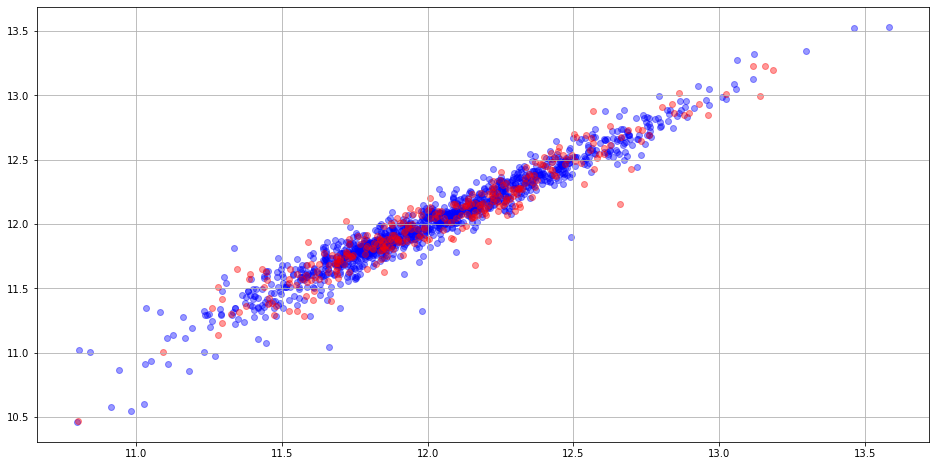

In [6]:
plt.figure(figsize=(16, 8))
plt.scatter(gs_mlr_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_mlr_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

## Trying with Lasso

In [7]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

lasso = Lasso(random_state=state, max_iter=1000000, selection='random',
              normalize=True, fit_intercept=True)

# parameters to use
alphas = np.linspace(1e-4, 2.5e-4, 30)
gparam_lasso_1 = {'alpha': alphas}

# setting parameters
gs_lasso_1 = ms.GridSearchCV(lasso, gparam_lasso_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_lasso_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_lasso_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_lasso_1, ytrain, xtrain))
test_rmse.append(rmse(gs_lasso_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_lasso_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lasso_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lasso_res_df = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df

Wall time: 1.56 s


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha
0,0.928578,0.938886,0.105926,0.101771,0.004155,0.000121


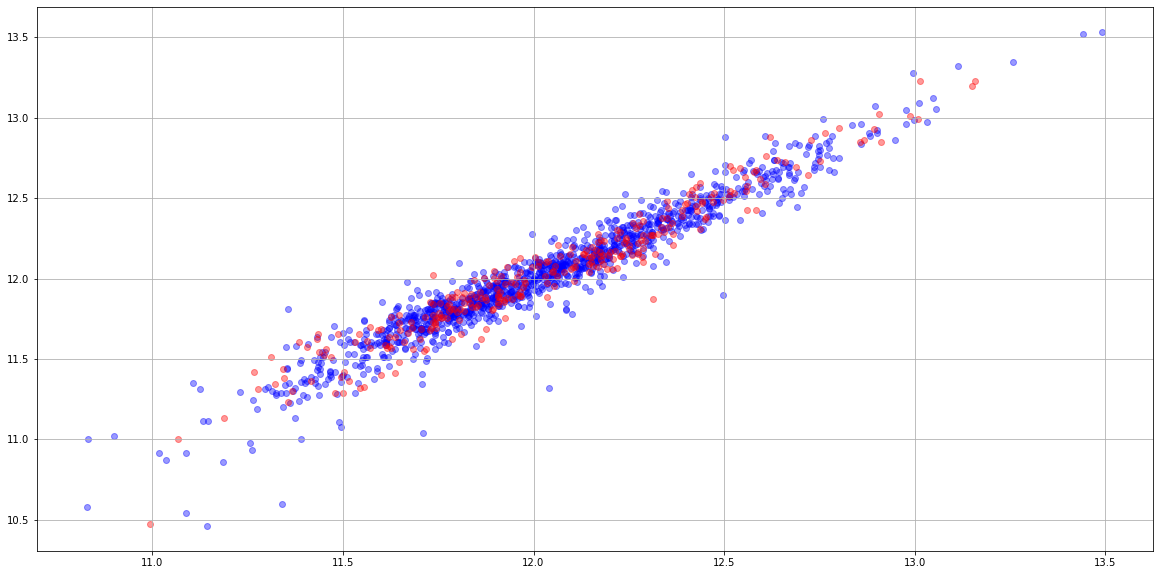

In [8]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

- we see underfitting

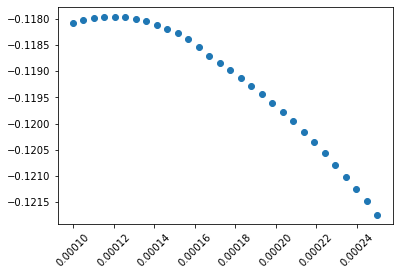

In [9]:
plt.xticks(rotation=45)
plt.scatter(gs_lasso_1.cv_results_['param_alpha'], gs_lasso_1.cv_results_['mean_test_score'])

## Using reduced DF hp_full_strd

In [10]:
lasso_coef_strd = pd.Series(gs_lasso_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(lasso_coef_strd.abs().sort_values(ascending=False).to_string())

TotalLivSF                                                          1.455020
OverallQual                                                         0.505810
1stFlrSF                                                            0.417431
LotArea                                                             0.383340
OverallCond                                                         0.254937
YearBuilt                                                           0.172118
Functional                                                          0.167587
BsmtUnfSF                                                           0.160715
GarageCars                                                          0.155458
Exterior1st_BrkComm                                                 0.109781
LotFrontage                                                         0.108560
Neighborhood_Crawfor                                                0.105956
KitchenAbvGr                                                        0.102552

In [11]:
lasso_coef_index_01 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) > 0]

hp_lasso_strd_reduced = hp_full_strd.iloc[:,lasso_coef_index_01]

# hp_lasso_strd_reduced.to_csv('..\hp_lasso_strd_reduced.csv')
hp_lasso_strd_reduced

,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,ScreenPorch,Fence,TotalLivSF,TotalPorchSF,YrsRemodToSold,Fireplace,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSZoning_FV,MSZoning_RL,LotShape_IR2,LotShape_Reg,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,BldgType_TwnhsE,BldgType_TwnhsI,RoofStyle_Gambrel,RoofMatl_Membran,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior2nd_Stucco,Exterior2nd_WdShing,MasVnrType_Stone,Foundation_PConc,Foundation_Wood,Heating_Grav,FireplaceQu_Gd,FireplaceQu_None,GarageType_Basment,GarageType_CarPort,SaleType_ConLI,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,1.0,0.666667,0.500,0.949275,0.122500,0.666667,0.8,0.25,0.166667,0.064212,1.00,1.0,0.109641,0.413559,0.333333,0.0,0.50,0.5,0.333333,0.666667,0.461538,1.000000,0.666667,0.4,0.368280,0.6,0.6,1.0,0.000000,0.0,0.00,0.237373,0.050539,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.202055,0.038795,1.0,0.555556,0.875,0.753623,0.000000,0.333333,0.8,1.00,0.166667,0.121575,1.00,1.0,0.194917,0.000000,0.000000,0.5,0.50,0.0,0.333333,0.333333,0.307692,1.000000,0.666667,0.4,0.309140,0.6,0.6,1.0,0.209270,0.0,0.00,0.217307,0.000000,0.516667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160959,0.046507,1.0,0.666667,0.500,0.934783,0.101250,0.666667,0.8,0.50,0.166667,0.185788,1.00,1.0,0.123083,0.419370,0.333333,0.0,0.50,0.5,0.333333,0.666667,0.307692,1.000000,0.666667,0.4,0.408602,0.6,0.6,1.0,0.000000,0.0,0.00,0.220955,0.034797,0.100000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.133562,0.038561,1.0,0.666667,0.500,0.311594,0.000000,0.333333,0.6,0.25,0.166667,0.231164,0.75,1.0,0.131695,0.366102,0.333333,0.0,0.25,0.0,0.333333,0.666667,0.384615,1.000000,0.333333,0.6,0.431452,0.6,0.6,1.0,0.000000,0.0,0.00,0.182305,0.254350,0.600000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.215753,0.060576,1.0,0.777778,0.500,0.927536,0.218750,0.666667,0.8,0.75,0.166667,0.209760,1.00,1.0,0.170342,0.509927,0.333333,0.0,0.50,0.5,0.333333,0.666667,0.538462,1.000000,0.666667,0.6,0.561828,0.6,0.6,1.0,0.134831,0.0,0.00,0.287196,0.069594,0.133333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.140411,0.030929,1.0,0.555556,0.500,0.920290,0.000000,0.333333,0.8,0.25,0.166667,0.407962,1.00,1.0,0.130015,0.336077,0.000000,0.0,0.50,0.5,0.333333,0.333333,0.384615,1.000000,0.666667,0.4,0.309140,0.6,0.6,1.0,0.000000,0.0,0

## features that were kept with lasso

In [12]:
list(hp_lasso_strd_reduced.columns)

['LotFrontage',
 'LotArea',
 'Street',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'Fence',
 'TotalLivSF',
 'TotalPorchSF',
 'YrsRemodToSold',
 'Fireplace',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_2-STORY 1945 & OLDER',
 'MSSubClass_2-STORY PUD - 1946 & NEWER',
 'MSZoning_FV',
 'MSZoning_RL',
 'LotShape_IR2',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somers

In [13]:
# columns that were dropped by lasso

lasso_coef_index_00 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) == 0]
hp_lasso_strd_dropped = hp_full_strd.iloc[:, lasso_coef_index_00]
list(hp_lasso_strd_dropped.columns)

['Alley',
 'Utilities',
 'YearRemodAdd',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType1',
 'Electrical',
 'LowQualFinSF',
 'BedroomAbvGr',
 'GarageYrBlt',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolQC',
 'MiscVal',
 'NbMedianRank',
 'BsmtFin',
 'Pool',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-1/2 STORY PUD - ALL AGES',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSSubClass_SPLIT FOYER',
 'MSSubClass_SPLIT OR MULTI-LEVEL',
 'MSZoning_RH',
 'MSZoning_RM',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Se

## using the lasso reduced dataset in multilinear regression

In [14]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train_lso and test_lso sets
xtrain_lso, xtest_lso, ytrain_lso, ytest_lso = ms.train_test_split(hp_lasso_strd_reduced,
                                                                   hp_logsaleprice,
                                                                   test_size=0.2,
                                                                   random_state=0)

# Must flatten to fit
ytrain_lso = ytrain_lso.values.flatten()

lm = LinearRegression()

# parameters to use
fitintercept = [True, False]
gparam_mlr = {'fit_intercept': fitintercept}

# setting parameters
gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr.fit(xtrain_lso, ytrain_lso)

# setting up dataframe for results
train_scores.append(gs_mlr.best_estimator_.score(xtrain_lso, ytrain_lso))
test_scores.append(gs_mlr.best_estimator_.score(xtest_lso, ytest_lso))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr, ytrain_lso, xtrain_lso))
test_rmse.append(rmse(gs_mlr, ytest_lso, xtest_lso))

# add the best parameters to the df
best_par_list.append(gs_mlr.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'train_rmse', 'test_rmse', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df_sel2 = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_sel2

Wall time: 28 ms


,TrainScores,TestScores,train_rmse,test_rmse,DiffRMSE,fit_intercept
0,0.934199,0.933575,0.101672,0.106101,-0.004428,False


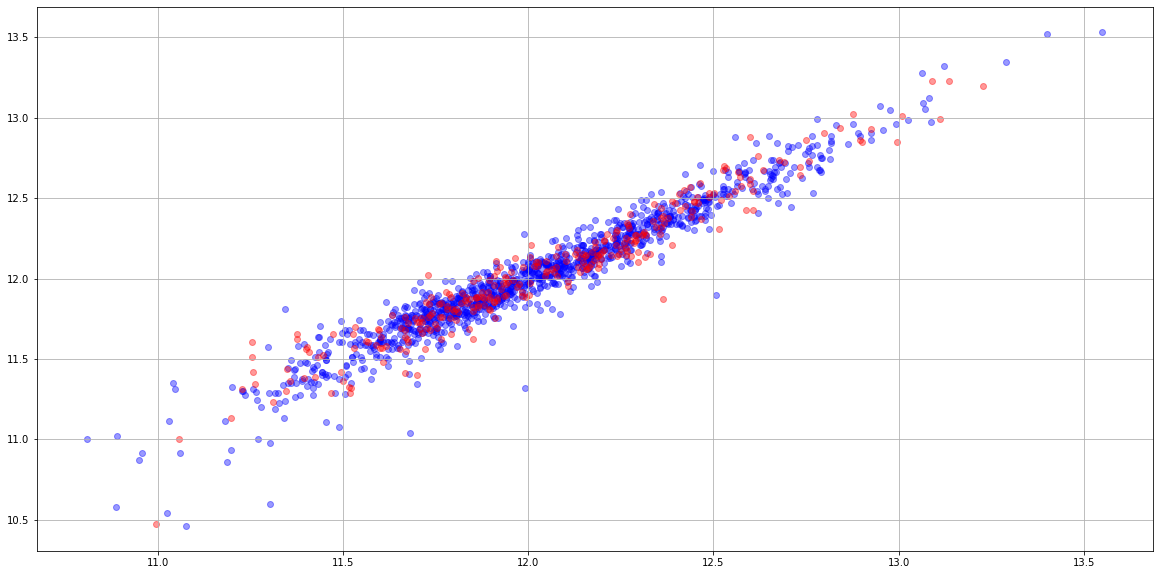

In [15]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain_lso), ytrain_lso, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest_lso), ytest_lso, color='red', alpha=0.4)
plt.grid(which='both')

## Trying w Ridge

In [16]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

ridge = Ridge(random_state=state, max_iter=10000, fit_intercept=True)

# parameters to use
# alphas = np.linspace(1e-4, 2.5e-4, 30) 'alpha': alphas,
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
fitintercept = [True, False]

gparam_ridge_1 = {'solver': solvers,
                  'fit_intercept': fitintercept, 
                  'random_state': [state]}

# setting parameters
gs_ridge_1 = ms.GridSearchCV(ridge, gparam_ridge_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_ridge_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_ridge_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_ridge_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_ridge_1, ytrain, xtrain))
test_rmse.append(rmse(gs_ridge_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_ridge_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
ridge_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
ridge_res_df = pd.DataFrame(ridge_list_results).T
ridge_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
ridge_res_df = pd.concat([ridge_res_df, best_par_df], axis=1, sort=False)

ridge_res_df

Wall time: 458 ms


C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.12353993 -0.12353993 -0.12353993 -0.12367481 -0.1237516  -0.12357177
 -0.12360639         nan -0.18024967 -0.18024967 -0.18024967 -0.18204618
 -0.3021702  -0.1809898  -0.18282029         nan]
  warnings.warn(
C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [-0.09520716 -0.09520716 -0.09520716 -0.09531708 -0.09532842 -0.09533096
 -0.09548243         nan -0.12491133 -0.12491133 -0.12491133 -0.12709801
 -0.27172839 -0.12619902 -0.12867302         nan]
  warnings.warn(


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,fit_intercept,random_state,solver
0,0.939601,0.927661,0.097409,0.110723,-0.013314,True,0,svd


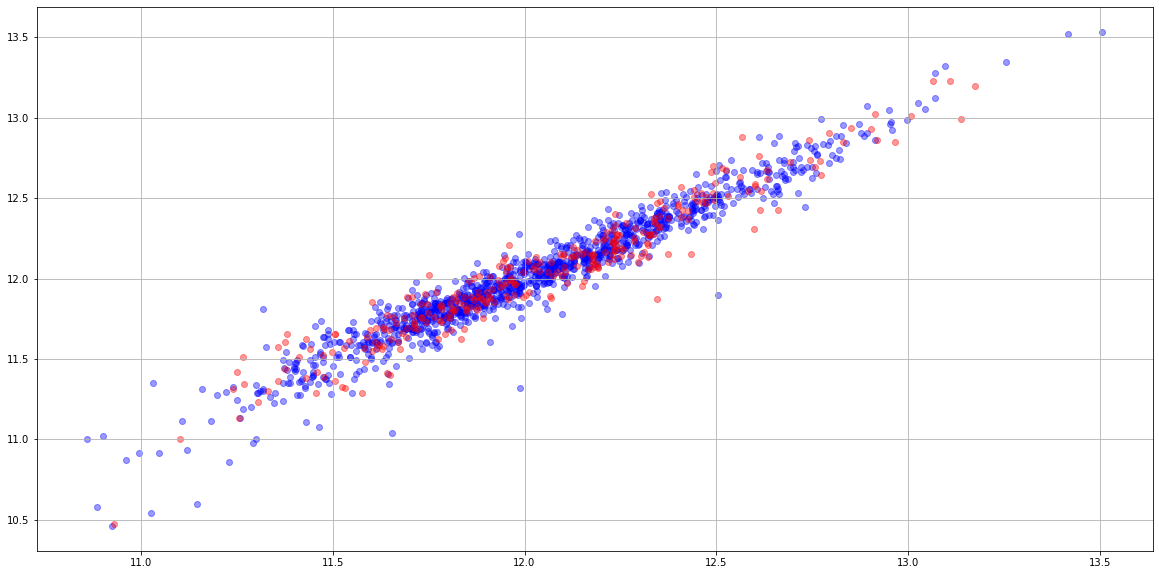

In [17]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_ridge_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_ridge_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [18]:
ridge_coef_strd = pd.Series(gs_ridge_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(ridge_coef_strd.abs().sort_values(ascending=False).to_string())

TotalLivSF                                                          6.423764e-01
1stFlrSF                                                            5.455590e-01
OverallQual                                                         3.738354e-01
LotArea                                                             2.665790e-01
OverallCond                                                         2.593293e-01
2ndFlrSF                                                            2.510577e-01
MSZoning_FV                                                         2.317102e-01
TotRmsAbvGrd                                                        2.104560e-01
MSZoning_RL                                                         2.032670e-01
MSZoning_RH                                                         1.900116e-01
FullBath                                                            1.726641e-01
MSZoning_RM                                                         1.716545e-01
Functional                  

In [19]:
ridge_coef_index_01 = [i for i, x in enumerate(ridge_coef_strd) if abs(x) > 0]

hp_ridge_strd_reduced = hp_full_strd.iloc[:,ridge_coef_index_01]

hp_ridge_strd_reduced

,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscVal,NbMedianRank,TotalLivSF,BsmtFin,TotalPorchSF,YrsRemodToSold,Fireplace,Pool,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-1/2 STORY PUD - ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRA,Condition1_RRN,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRA,Condition2_RRN,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,1.0,0.0,1.0,0.666667,0.500,0.949275,0.883333,0.122500,0.666667,0.50,0.8,0.75,0.25,1.000000,0.166667,0.064212,1.00,1.0,1.00,0.109641,0.413559,0.0,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.461538,1.000000,0.996517,0.666667,0.4,0.368280,0.6,0.6,1.0,0.000000,0.082210,0.

- because Ridge thinks all of the features have some kind of importance, the list is not actually of much value

## Trying w ElasticNet

In [20]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

enet = ElasticNet(random_state=state, max_iter=10000,
                  normalize=True, fit_intercept=True)

# parameters to use
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 0, 1, 10, 100]
l1ratio = [0, 0.25, 0.5, 0.75, 1]
fitintercept = [True, False]
precomputes = [True, False]
warmstart = [True, False]
selections = ['cyclic', 'random']

gparam_enet_1 = {'alpha': alphas,
                  'l1_ratio': l1ratio,
                  'fit_intercept': fitintercept,
                  'precompute': precomputes, 
                  'warm_start': warmstart,
                  'selection': selections,
                  'random_state': [state]}

# setting parameters
gs_enet_1 = ms.GridSearchCV(enet, gparam_enet_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_enet_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_enet_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_enet_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_enet_1, ytrain, xtrain))
test_rmse.append(rmse(gs_enet_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_enet_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
enet_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
enet_res_df = pd.DataFrame(enet_list_results).T
enet_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
enet_res_df = pd.concat([enet_res_df, best_par_df], axis=1, sort=False)

enet_res_df

Wall time: 57.6 s


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha,fit_intercept,l1_ratio,precompute,random_state,selection,warm_start
0,0.930499,0.93865,0.104492,0.101967,0.002525,0.0001,True,1,True,0,random,True


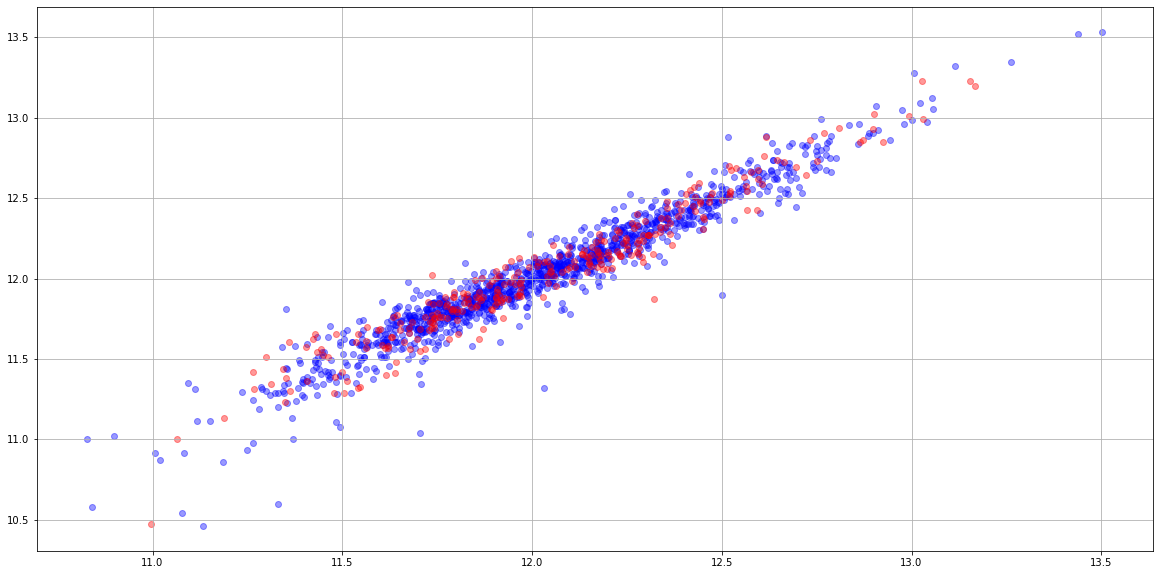

In [21]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_enet_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_enet_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [22]:
enet_coef_strd = pd.Series(gs_enet_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(enet_coef_strd.abs().sort_values(ascending=False).to_string())

TotalLivSF                                                          1.406786
OverallQual                                                         0.489486
1stFlrSF                                                            0.455166
LotArea                                                             0.384468
OverallCond                                                         0.261371
YearBuilt                                                           0.177706
Functional                                                          0.171620
BsmtUnfSF                                                           0.160338
GarageCars                                                          0.150232
Exterior1st_BrkComm                                                 0.122707
KitchenAbvGr                                                        0.113610
2ndFlrSF                                                            0.110981
Neighborhood_Crawfor                                                0.107790

In [23]:
# columns that were dropped by enet

enet_coef_index_00 = [i for i, x in enumerate(enet_coef_strd) if abs(x) == 0]
hp_enet_strd_dropped = hp_full_strd.iloc[:, enet_coef_index_00]
list(hp_enet_strd_dropped.columns)

['Alley',
 'YearRemodAdd',
 'ExterCond',
 'BsmtCond',
 'Electrical',
 'LowQualFinSF',
 'BedroomAbvGr',
 'GarageYrBlt',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolQC',
 'MiscVal',
 'NbMedianRank',
 'BsmtFin',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-1/2 STORY PUD - ALL AGES',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSSubClass_SPLIT FOYER',
 'MSSubClass_SPLIT OR MULTI-LEVEL',
 'MSZoning_RH',
 'MSZoning_RM',
 'LotShape_IR3',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
